In [66]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [67]:
credits_df = pd.read_csv('dataset/credits.csv')
titles_df = pd.read_csv('dataset/titles.csv')

In [68]:
credits_df
unique_count = credits_df['id'].nunique()
print(unique_count)

5489


In [69]:
titles_df
unique_count = titles_df['id'].nunique()
print(unique_count)


5850


In [70]:
combined_df = pd.merge(titles_df, credits_df, left_on = "id", right_on = "id")
combined_df = combined_df.drop('character', axis=1)
combined_df.dropna(subset=['title'], inplace=True)
combined_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3748,Robert De Niro,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,14658,Jodie Foster,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,7064,Albert Brooks,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,3739,Harvey Keitel,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77796,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,736339,Adelaida Buscato,ACTOR
77797,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,399499,Luz Stella Luengas,ACTOR
77798,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,373198,Inés Prieto,ACTOR
77799,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.300,378132,Isabel Gaona,ACTOR


In [71]:
combined_df.drop(columns=['seasons'], inplace=True)
combined_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,3748,Robert De Niro,ACTOR
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,14658,Jodie Foster,ACTOR
2,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,7064,Albert Brooks,ACTOR
3,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,3739,Harvey Keitel,ACTOR
4,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],tt0075314,8.2,808582.0,40.965,8.179,48933,Cybill Shepherd,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77796,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,736339,Adelaida Buscato,ACTOR
77797,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,399499,Luz Stella Luengas,ACTOR
77798,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,373198,Inés Prieto,ACTOR
77799,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],tt14585902,3.8,68.0,26.005,6.300,378132,Isabel Gaona,ACTOR


In [73]:
actor_counts = combined_df['person_id'].value_counts()
actors_more_than_one_movie = actor_counts[actor_counts > 1].index

filtered_df = combined_df[combined_df['person_id'].isin(actors_more_than_one_movie)]

In [74]:


actor_avg_scores = filtered_df.groupby('name')['imdb_score'].mean().reset_index().dropna()
actor_avg_scores

,name,imdb_score
0,'Weird Al' Yankovic,6.500000
1,50 Cent,6.866667
2,A$AP Rocky,6.650000
3,A. L. Vijay,6.000000
4,A.D. Miles,6.766667
...,...,...
11893,Łukasz Simlat,6.600000
11894,Şafak Sezer,7.133333
11895,Şebnem Bozoklu,5.050000
11896,Şenol Sönmez,5.150000


In [75]:
top100Actors=actor_avg_scores.sort_values(by='imdb_score', ascending=False)
top100Actors=top100Actors.head(10)

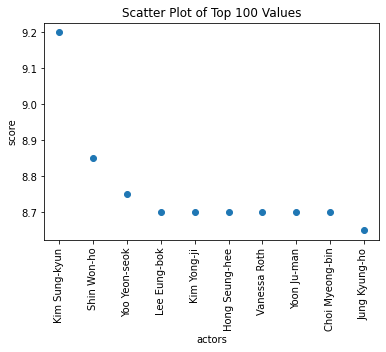

<Figure size 360x1440 with 0 Axes>

In [76]:
x = top100Actors['name']
y = top100Actors['imdb_score']

# Create scatter plot
plt.scatter(x, y)
plt.xlabel('actors')
plt.ylabel('score')
plt.title('Scatter Plot of Top 100 Values')
plt.xticks(rotation=90)
plt.figure(figsize=(5, 20))
plt.show()

In [77]:
# pivot_df = combined_df.pivot_table(index=['id', 'title', 'type', 'description', 'release_year', 'age_certification', 'runtime', 'genres', 'production_countries', 'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score'],
#                           columns='role',
#                           values='name',
#                           aggfunc=lambda x: ', '.join(x)).reset_index()
# pivot_df
# Pivot the table
pivot_df = combined_df.pivot_table(index=combined_df.index, columns='role', values='name', aggfunc='first')

# Reset index if needed
pivot_df.reset_index(drop=True, inplace=True)
pivot_df

role,ACTOR,DIRECTOR
0,Robert De Niro,NaN
1,Jodie Foster,NaN
2,Albert Brooks,NaN
3,Harvey Keitel,NaN
4,Cybill Shepherd,NaN
...,...,...
77795,Adelaida Buscato,NaN
77796,Luz Stella Luengas,NaN
77797,Inés Prieto,NaN
77798,Isabel Gaona,NaN


In [78]:
shows = combined_df[combined_df['type'] != 'MOVIE']
shows

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
163,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],tt0063929,8.8,73424.0,17.617,8.306,11472,Graham Chapman,ACTOR
164,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],tt0063929,8.8,73424.0,17.617,8.306,11476,Michael Palin,ACTOR
165,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],tt0063929,8.8,73424.0,17.617,8.306,11475,Terry Jones,ACTOR
166,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],tt0063929,8.8,73424.0,17.617,8.306,11474,Eric Idle,ACTOR
167,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],tt0063929,8.8,73424.0,17.617,8.306,11473,Terry Gilliam,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77655,ts288861,Let's Eat,SHOW,A food-blogging insurance agent encounters a f...,2021,TV-14,60,"['drama', 'comedy']",['TH'],tt15978704,8.2,5.0,2.334,NaN,142070,Maneerat Kam-Uan,ACTOR
77656,ts288861,Let's Eat,SHOW,A food-blogging insurance agent encounters a f...,2021,TV-14,60,"['drama', 'comedy']",['TH'],tt15978704,8.2,5.0,2.334,NaN,168201,Rudklao Amratisha,ACTOR
77657,ts288861,Let's Eat,SHOW,A food-blogging insurance agent encounters a f...,2021,TV-14,60,"['drama', 'comedy']",['TH'],tt15978704,8.2,5.0,2.334,NaN,171222,Jaturong Mokjok,ACTOR
77658,ts288861,Let's Eat,SHOW,A food-blogging insurance agent encounters a f...,2021,TV-14,60,"['drama', 'comedy']",['TH'],tt15978704,8.2,5.0,2.334,NaN,247588,Pisamai Wilaisak,ACTOR


TODO: Average score by genre

TODO: Sort Actors by score


In [79]:

grouped_df = shows.groupby('title').agg(set).reset_index()
grouped_df

,title,id,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,role
0,#blackAF,{ts236033},{SHOW},{A father takes an irreverent and honest appro...,{2020},{TV-MA},{37},{['comedy']},{['US']},{nan},"{nan, nan, nan, nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan, nan, nan, nan}",{2.924},{7.1},"{1280777, 1060299, 1405871, 834162, 21715, 118...","{Scarlet Spencer, Richard Gardenhire Jr., Genn...",{ACTOR}
1,100 Days My Prince,{ts83359},{SHOW},{Lee Yool falls off a cliff and nearly dies in...,{2018},{TV-14},{75},"{['drama', 'thriller', 'comedy', 'action', 'hi...",{['KR']},{tt8199972},{7.7},{2068.0},{10.313},{8.323},"{75400, 137871, 948753, 858776, 110122, 296237...","{Ahn Suk-hwan, Yeon-ah Oh, Han So-hee, Lee Min...","{DIRECTOR, ACTOR}"
2,100 Humans: Life's Questions. Answered.,{ts226588},{SHOW},{One hundred hardy souls from diverse backgrou...,{2020},{TV-14},{37},"{['documentation', 'reality']}",{['US']},{tt11823088},{5.7},{4055.0},{3.447},{6.4},"{1922852, 1363723, 1923218, 1120189, 1651806}","{Haley Bockrath, Komalpreet Batth, Braxton Hal...",{ACTOR}
3,13 Reasons Why,{ts42294},{SHOW},"{After a teenage girl's perplexing suicide, a ...",{2017},{TV-MA},{58},"{['drama', 'thriller']}",{['US']},{tt1837492},{7.5},{286015.0},{80.574},{7.748},"{282177, 1025665, 112323, 23717, 15238, 119053...","{Timothy Granaderos, Devin Druid, Deaken Bluma...",{ACTOR}
4,13 Reasons Why: Beyond the Reasons,{ts82424},{SHOW},"{Cast members, writers, producers and mental h...",{2017},{TV-MA},{42},{['documentation']},{['US']},{tt8615966},{6.2},{328.0},{11.431},{6.5},"{282176, 16431, 1573071, 5144, 1119}","{Katherine Langford, Selena Gomez, Dylan Minne...",{ACTOR}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1826,revisions,{ts84639},{SHOW},{An isolated city. An unknown enemy. An uncert...,{2019},{TV-MA},{23},"{['animation', 'action', 'scifi']}",{['JP']},{tt9522354},{5.9},{612.0},{4.35},{7.0},"{12003, 115686, 3590, 97290, 138, 204, 274, 10...","{Yoko Hikasa, Takahiro Sakurai, Mikako Komatsu...",{ACTOR}
1827,นางสาวก้นครัว,{ts223454},{SHOW},"{""Miss Culinary"" reveals the brilliance of a y...",{2019},{TV-14},{0},{[]},{['TH']},{nan},"{nan, nan, nan, nan, nan}","{nan, nan, nan, nan, nan}",{2.431},{8.0},"{1850528, 271137, 141199, 163259, 707327}","{Jason Young, Louis Thanawin Teeraphosukarn, W...",{ACTOR}
1828,ปริศนาล่าข้ามเวลา,{ts223062},{SHOW},{nan},{2019},{TV-14},{60},{[]},{['TH']},{nan},{nan},{nan},{1.473},{7.0},{646657},{Morakot Liu},{ACTOR}
1829,糖糖Online,{ts222901},{SHOW},"{When a wardrobe malfunction goes viral, a bub...",{2019},{TV-MA},{24},"{['drama', 'family']}",{['TW']},{tt11330500},{5.4},{22.0},{0.6},{10.0},"{1260133, 1260135, 1186315, 1260082, 1260020, ...","{Chen Wen-shan, Ada Pan, Chiao Yuan-Yuan, Jacq...",{ACTOR}
